# Lattice Proteins Notebook. 
LP are artificial protein sequences, used here to benchmark the algorithm against ground truth knowledge of the structure and of the fitness function

## Loading data and packages

../source/numba_utilities.py:1124: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
../source/numba_utilities.py:1125: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
../source/numba_utilities.py:1126: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
../source/numba_utilities.py:961: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 2d, A))
  mean_V = np.dot(weights, V) / sum_weights


Missing packages for importing Proteins_3D_utils
First sequence numerical encoding
[ 3  8  0 10 12  0 10  2 12  2 10  0  6  3  6  8  8  8  7 14  0 18 10  4
  3  5  3]
Corresponding Amino-Acids:
EKAMPAMDPDMAHEHKKKIRAWMFEGE


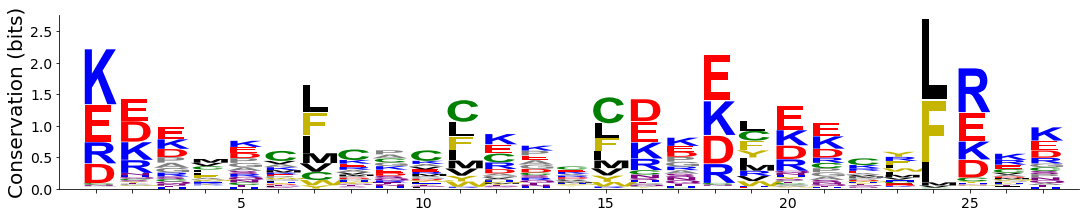

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../source/')
sys.path.append('../utilities/')
from common_imports import set_num_threads
set_num_threads(2) # Set the number of cores. Must be executed before importing numpy&numba.
import numpy as np
import rbm,utilities
import pandas as pd
import Proteins_utils, RBM_utils, utilities,sequence_logo,plots_utils


# from float_precision import curr_float,curr_int


filename = 'Lattice_Proteins_MSA.fasta'
filename_pnat = 'Lattice_Proteins_pnat.txt'
path = u'../data/Lattice_Proteins/'

all_data = Proteins_utils.load_FASTA(path+filename)
all_pnat = np.asarray(pd.read_csv(path+filename_pnat,sep=' ',header=None))[:,0]


data = all_data[:-10000]
logpnat = np.log(all_pnat[:-10000])
data_test = all_data[-10000:]
logpnat_test = np.log(all_pnat[-10000:])


weights = None
weights_test = None

print('First sequence numerical encoding')
print(all_data[0])
print('Corresponding Amino-Acids:')
print(Proteins_utils.num2seq(all_data[0]))


mu = utilities.average(all_data,c=21,weights=None)
sequence_logo.Sequence_logo(mu,ticks_every=5,figsize=(15,3));

Sequences have high probability to fold into $S_A$. $S_G$ is one of the main competing structures.

![](../data/LatticeProteins/Figure_Lattice_Proteins.png)

In [2]:
n_v = 27 # Number of visible units; = # sites in alignment.
n_h = 100 # Number of hidden units.
visible = 'Potts' # Nature of visible units potential. Here, Potts states...
n_cv = 20 # With n_cv = 20 colors (all possible amino acids)
hidden = 'dReLU' # Nature of hidden units potential. Here, dReLU potential.

RBM = rbm.RBM(visible = visible,hidden = hidden,n_v = n_v,n_h = n_h, n_cv = n_cv)
batch_size = 100 # Size of mini-batches (and number of Markov chains used). Default: 100.
n_iter = 100 # Number of epochs
learning_rate = 5e-3 # Initial learning rate (default: 5e-3)
decay_after = 0.5 # Decay learning rate after 50% of iterations (default: 0.5)
l1b = 0.025 # L1b regularization. Default : 0.
N_MC = 5 # Number of Monte Carlo steps between each update
    
RBM.fit(data, weights= weights, batch_size = batch_size,
        n_iter = n_iter, l1b = l1b, N_MC = N_MC, 
       decay_after = decay_after, verbose = 0,vverbose=1 )

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

{}

## Evaluate accuracy of training: Train and test set likelihood

In [3]:
RBM.AIS(n_betas=20000,verbose=1) # Compute partition function with annealed importance sampling

print(RBM.likelihood(data).mean()/27, RBM.likelihood(data_test).mean()/27)



Initial evaluation: log(Z) = [329.7912]
Mismatch dimensions (100, 100), [10, 100], reinitializating I
Mismatch dimensions (100, 27, 20), [10, 27, 20], reinitializating I
Iteration 2000, beta: 0.10000500025001251
Current evaluation: log(Z)= 325.18344 +- 0.008804941852593352
Iteration 4000, beta: 0.20001000050002501
Current evaluation: log(Z)= 321.84634 +- 0.015183622678899765
Iteration 6000, beta: 0.3000150007500375
Current evaluation: log(Z)= 319.54364 +- 0.018538498654420008
Iteration 8000, beta: 0.40002000100005003
Current evaluation: log(Z)= 318.16217 +- 0.019377541314852947
Iteration 10000, beta: 0.5000250012500626
Current evaluation: log(Z)= 317.64206 +- 0.02213718065766216
Iteration 12000, beta: 0.600030001500075
Current evaluation: log(Z)= 317.91547 +- 0.023901760048210426
Iteration 14000, beta: 0.7000350017500875
Current evaluation: log(Z)= 318.9454 +- 0.019536099639454584
Iteration 16000, beta: 0.8000400020001001
Current evaluation: log(Z)= 320.68195 +- 0.019325731105588263
It

# Selecting interesting hidden units.
Since the learning process is stochastic, each training produces different weights.
An important part resides in selecting potentially important features. Here, we perform a quick selection based on three criteria:
- Hidden unit importance score. Similarly to PCA, hidden units contribute differently to the likelihood.
- Weight sparsity. Sparser weights are often easier to interpretate.
- Jump and asymmetry of the hidden unit non-linearity <h_\mu | I_\mu>. When using dReLU potentials, the shape of the non-linearity adapts to the hidden unit input statistics. Hidden units with large jumps often have a bimodal input distribution. Such hidden units partition the sequence space into subgroups that could have distinct functionality. When the asymmetry is strong, one of the subgroups is usually much smaller.


Mismatch dimensions (10, 100), [200, 100], reinitializating I
Mismatch dimensions (10, 27, 20), [200, 27, 20], reinitializating I


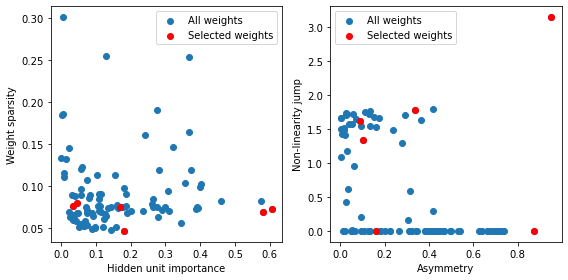

In [4]:
hidden_unit_importance = RBM_utils.get_hidden_unit_importance(RBM,all_data);
p = RBM_utils.get_sparsity(RBM.weights)
jump = RBM_utils.get_hlayer_jump(RBM)
asymmetry = RBM_utils.get_hlayer_asymmetry(RBM)

i1 = np.argmin(p) # Most sparse.
i2 = np.argmin( np.abs(p - np.median(p))  ) # Close to median sparsity.
i3 = np.argsort(hidden_unit_importance)[-1] # Large importance.
i4 = np.argsort(hidden_unit_importance)[-2] # Large importance.
i5 = np.argmax(jump) # Large jump
i6 = np.argmax(asymmetry ) # Large asymmetry.
if i6 == i5:
    i6 = np.argsort(asymmetry )[-2] # Large asymmetry.    

interesting_features = [i1,i2,i3,i4,i5,i6]

fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(hidden_unit_importance,p)
ax[0].scatter(hidden_unit_importance[interesting_features],p[interesting_features],c='red')
ax[0].set_xlabel('Hidden unit importance')
ax[0].set_ylabel('Weight sparsity')
ax[0].legend(['All weights','Selected weights'])
ax[1].scatter(asymmetry,jump)
ax[1].scatter(asymmetry[interesting_features],jump[interesting_features],c='red')
ax[1].set_xlabel('Asymmetry')
ax[1].set_ylabel('Non-linearity jump')
ax[1].legend(['All weights','Selected weights'])
plt.tight_layout()
plt.show()


## Visualizing hidden units: Sequence logo of weights

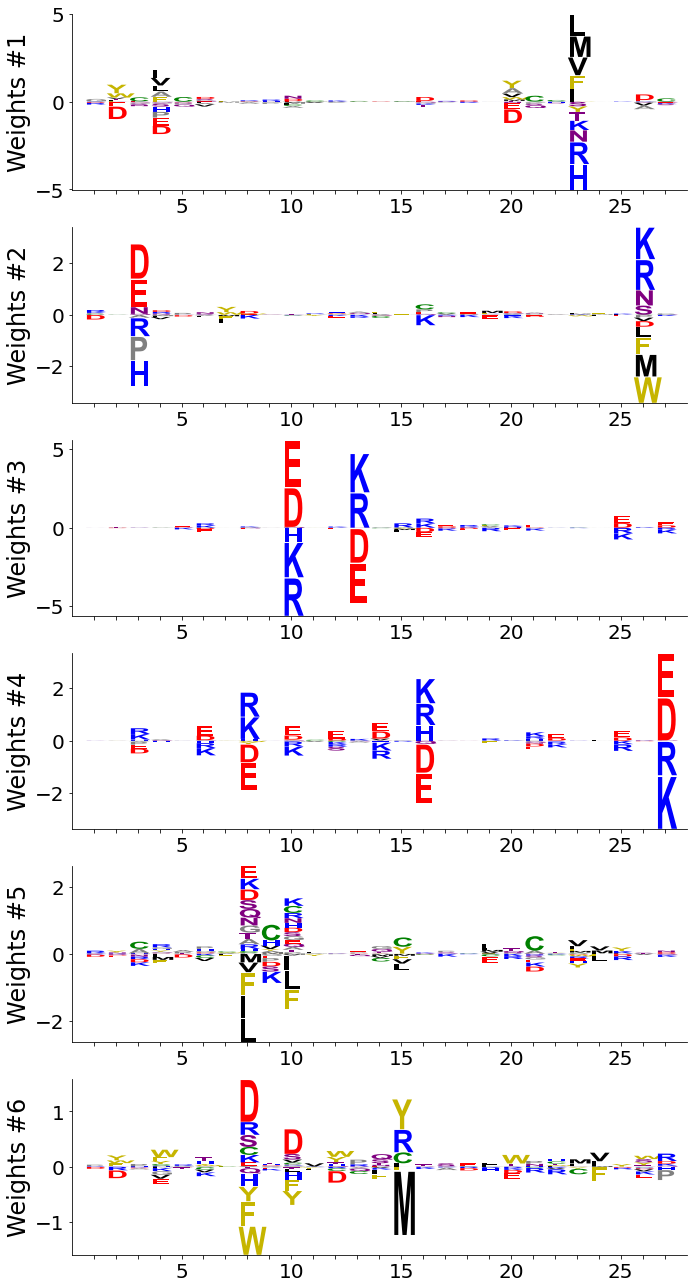

In [5]:
nsites = len(interesting_features)
fig = sequence_logo.Sequence_logo_multiple(RBM.weights[interesting_features], figsize=(10,3) ,ticks_every=5,ticks_labels_size=20,title_size=24);



## Visualizing hidden units: Distribution of inputs and non-linearity.
Protein sequences cluster according to the projections onto the weights.

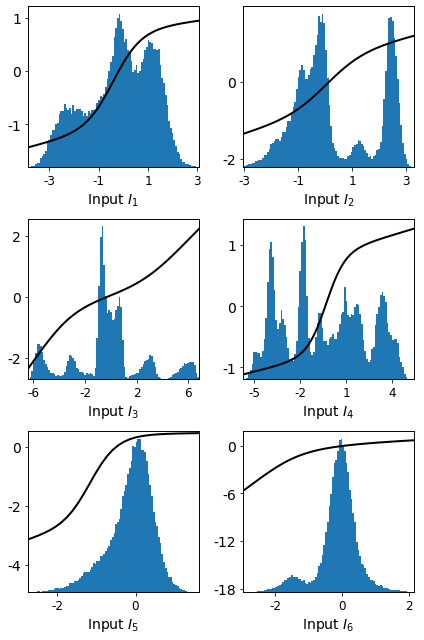

In [7]:
## Display their histograms of activations.

I = RBM.input_hiddens(all_data) # compute hidden unit input.
# Show inputs histogram and conditional means
plots_utils.plot_input_mean(RBM,I, interesting_features,ncols=2); 

## Visualizing hidden units: Phylogenic activity.
Are the features active across all, or only a portion of the phylogenic tree ? To assess this, we pick for each hidden unit the 20 sequences with highest $I_\mu$ (or lowest, depending on the sign of the non-linearity), and compute the distances between each pair. We compare to the background distribution of pairwise distances

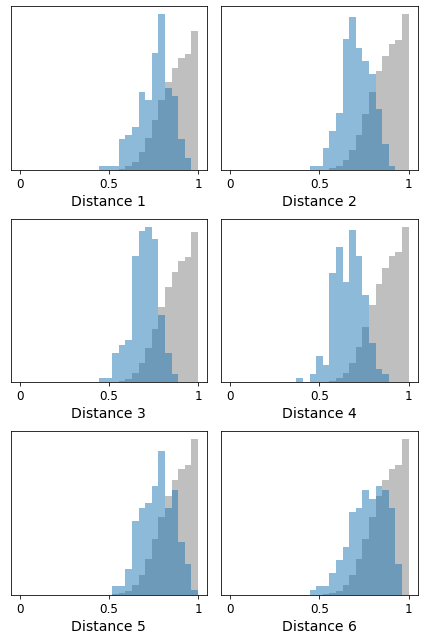

In [8]:
# Compute histogram of distances between top-activating sequences.
plots_utils.plot_top_activating_distance(RBM, I,all_data,interesting_features,ncols=2);

## Script for visualizing all hidden units into a single PDF. 
Requires  pdfjoin

In [22]:
# Make all the previous plots, for all hidden units into a same pdf. Requires the utility pdfjoin.
plots_utils.make_all_weights(RBM,all_data,name = 'all_weights_LP.pdf');

Make all weights: Done.


## Sampling from trained RBM.
Combining low-temperature sampling (with the duplicate RBM trick)  and conditional sampling allows to generate high-quality sequences with combinations of features unseen in the MSA.

4930 pairs have all four combinations 
20 pairs have only three combinations 
0 pairs have only two combinations 
Conditioning on feature pair (2,17); missing combination --


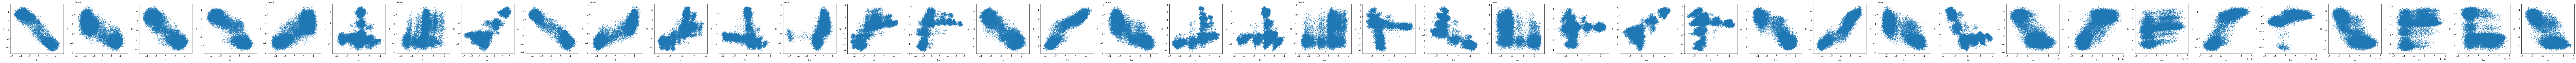

In [10]:
# First, let's look for a few combination of hidden unit features almost unseen in the data.

h = RBM.hlayer.mean_from_inputs(I)
signs = np.sign(h)

combinations_pp = (((signs>0)[:,:,np.newaxis] )  &  ((signs>0)[:,np.newaxis,:] ) ).mean(0) # Fraction of sequences with h_i>0,h_j>0 for all i,j
combinations_pm = (((signs>0)[:,:,np.newaxis] )  &  ((signs<0)[:,np.newaxis,:] ) ).mean(0) # Fraction of sequences with h_i>0,h_j<0 for all i,j
combinations_mp = (((signs<0)[:,:,np.newaxis] )  &  ((signs>0)[:,np.newaxis,:] ) ).mean(0) # Fraction of sequences with h_i<0,h_j>0 for all i,j
combinations_mm = (((signs<0)[:,:,np.newaxis] )  &  ((signs<0)[:,np.newaxis,:] ) ).mean(0) # Fraction of sequences with h_i<0,h_j<0 for all i,j

proba_min = 0.01

num_combinations_represented = 1*(combinations_pp>proba_min) + 1*(combinations_pm>proba_min) + 1*(combinations_mp>proba_min) + 1*(combinations_nn>proba_min)


print('%.f pairs have all four combinations '% ((num_combinations_represented == 4).sum()/2 ) )
print('%.f pairs have only three combinations '% ((num_combinations_represented == 3).sum()/2) )
print('%.f pairs have only two combinations '% ((num_combinations_represented == 2).sum() - RBM.n_h ) )



idx1,idx2 = np.nonzero(num_combinations_represented==3)
fig, ax = plt.subplots(1,len(idx1),figsize=(4*len(idx1),4))
for l in range(len(idx1)):
    ax[l].scatter(I[:,idx1[l]],I[:,idx2[l]],s=1.);
    ax[l].set_xlabel('$I_{%s}$'%idx1[l])
    ax[l].set_ylabel('$I_{%s}$'%idx2[l])
plt.tight_layout()    


l = 0
conditioning_features = [idx1[l],idx2[l]]

if combinations_pp[conditioning_features[0],conditioning_features[1]] < proba_min:
    missing_combination = '++'
elif combinations_pm[conditioning_features[0],conditioning_features[1]] < proba_min:
    missing_combination = '+-'
elif combinations_mp[conditioning_features[0],conditioning_features[1]] < proba_min:
    missing_combination = '-+'
elif combinations_mm[conditioning_features[0],conditioning_features[1]] < proba_min:
    missing_combination = '--'    


print('Conditioning on feature pair (%s,%s); missing combination %s'%(conditioning_features[0],conditioning_features[1],missing_combination) )

In [31]:
# Next, determine values for conditioning the hidden units. 
# First, we compute the mean value in the negative and positive sides of the distribution.
# Then, we apply a multiplier. Using larger multiplier results in more polarized conditional distributions.

value_neg = []
value_pos = []
multiplier = 1.5
margin = 0.5
for conditioning_feature in conditioning_features:
    h_ = h[:,conditioning_feature]
    value_neg.append( multiplier * h_[h_<-margin].mean() )
    value_pos.append( multiplier * h_[h_>margin].mean() )    
    print('Hidden unit %s, negative value: %.2f, positive value: %.2f'%(conditioning_feature,value_neg[-1],value_pos[-1]) )

Hidden unit 8, negative value: -1.41, positive value: 1.66
Hidden unit 36, negative value: -1.54, positive value: 1.52


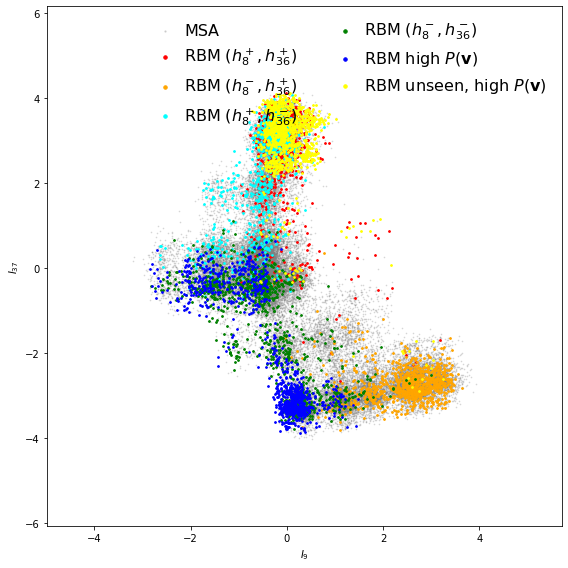

In [32]:
# Define conditions, as a list of tuples (index, value)
cond_pp = [(conditioning_features[0],value_pos[0]), (conditioning_features[1],value_pos[1]) ]
cond_pm = [(conditioning_features[0],value_pos[0]), (conditioning_features[1],value_neg[1]) ]
cond_mp = [(conditioning_features[0],value_neg[0]), (conditioning_features[1],value_pos[1]) ]
cond_mm = [(conditioning_features[0],value_neg[0]), (conditioning_features[1],value_neg[1]) ]
    

# The conditional distribution is equivalent to an RBM with M-2 hidden units. We construct them first.
condRBM_pp = RBM_utils.conditioned_RBM(RBM,cond_pp)
condRBM_pm = RBM_utils.conditioned_RBM(RBM,cond_pm)
condRBM_mp = RBM_utils.conditioned_RBM(RBM,cond_mp)
condRBM_mm = RBM_utils.conditioned_RBM(RBM,cond_mm)

# condRBM_* are RBM with M-2 hidden units, and fields = fields_RBM + \sum_{mu'} W_\mu' h_\mu', where mu' are the conditioning indexes.


# Use condRBM to generate sequences.
N_sequences = 1000 # Total number of sequences.
Nstep = 10 # Number of Monte Carlo steps between each update.

datav,datah = RBM.gen_data(Nchains = 100, Lchains = N_sequences//100,Nthermalize=500)

datav_pp,datah_pp = condRBM_pp.gen_data(Nchains = 100, Lchains = N_sequences//100,Nthermalize=500)

datav_pm,datah_pm = condRBM_pm.gen_data(Nchains = 100, Lchains = N_sequences//100,Nthermalize=500)

datav_mp,datah_mp = condRBM_mp.gen_data(Nchains = 100, Lchains = N_sequences//100,Nthermalize=500)

datav_mm,datah_mm = condRBM_mm.gen_data(Nchains = 100, Lchains = N_sequences//100,Nthermalize=500)
    

# Generate sequences at low temperature using the duplicate RBM trick.
datav_lowT,datah_lowT = RBM_utils.gen_data_lowT(RBM, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,Nthermalize=500)



if missing_combination == '++':
    datav_unseen = datav_pp
    datav_unseen_lowT, datah_unseen_lowT = RBM_utils.gen_data_lowT(condRBM_pp, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,Nthermalize=500)    
    datav_seen_lowT, datah_seen_lowT = RBM_utils.gen_data_lowT(condRBM_mm, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,Nthermalize=500)        
elif missing_combination == '+-':
    datav_unseen = datav_pm    
    datav_unseen_lowT, datah_unseen_lowT = RBM_utils.gen_data_lowT(condRBM_pm, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,Nthermalize=500)        
    datav_seen_lowT, datah_seen_lowT = RBM_utils.gen_data_lowT(condRBM_mp, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,Nthermalize=500)            
elif missing_combination == '-+':
    datav_unseen = datav_mp    
    datav_unseen_lowT, datah_unseen_lowT = RBM_utils.gen_data_lowT(condRBM_mp, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,Nthermalize=500)    
    datav_seen_lowT, datah_seen_lowT = RBM_utils.gen_data_lowT(condRBM_pm, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,Nthermalize=500)                
elif missing_combination == '--':    
    datav_unseen = datav_mm    
    datav_unseen_lowT, datah_unseen_lowT = RBM_utils.gen_data_lowT(condRBM_mm, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,Nthermalize=500)    
    datav_seen_lowT, datah_seen_lowT = RBM_utils.gen_data_lowT(condRBM_pp, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,Nthermalize=500)                


# Visualize the sequences in the I_2 X I_3 plane.
I_ = RBM.input_hiddens(datav)
I_pp = RBM.input_hiddens(datav_pp)
I_pm = RBM.input_hiddens(datav_pm)
I_mp = RBM.input_hiddens(datav_mp)
I_mm = RBM.input_hiddens(datav_mm)


I_lowT = RBM.input_hiddens(datav_lowT)
I_unseen_lowT = RBM.input_hiddens(datav_unseen_lowT)
I_seen_lowT = RBM.input_hiddens(datav_seen_lowT)




I_classes = [I_pp,
             I_pm,
             I_mp,
             I_mm,
             I_seen_lowT,
             I_unseen_lowT
            ]

class_names = [
    r'RBM $(h_{%s}^+,h_{%s}^+)$'%(conditioning_features[0],conditioning_features[1]),
    r'RBM $(h_{%s}^-,h_{%s}^+)$'%(conditioning_features[0],conditioning_features[1]),
    r'RBM $(h_{%s}^+,h_{%s}^-)$'%(conditioning_features[0],conditioning_features[1]),
    r'RBM $(h_{%s}^-,h_{%s}^-)$'%(conditioning_features[0],conditioning_features[1]),   
    r'RBM high $P({\bf v})$',
    r'RBM unseen, high $P({\bf v})$',
]

class_colors = ['red','orange','cyan','green','blue','yellow']

plots_utils.plot_input_classes_scatter(conditioning_features,I, I_classes,class_names = class_names,class_colors=class_colors,ncols_legend=2);

## Proximity with sequences from the alignment.
A good generative model should produce sequences that are reasonibly far away from the training set. Conversely, sequences that are too far away should have low likelihood and a trade-off exists.

For each generated sequence, we compute its likelihood and distance to the closest natural sequence.



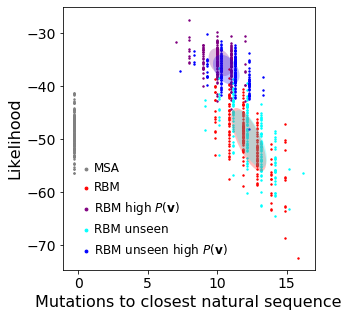

In [33]:
def distance_to_natural(synth_seq,nat_seq): # For each seq in synth_seq, compute the distance to the closest natural sequence 
    min_dists = []
    for seq in synth_seq:
        min_dists.append ((seq[np.newaxis,:] != nat_seq).sum(1).min() )
    return np.array(min_dists)


likelihood_natural = RBM.likelihood(all_data)
likelihood_generated = RBM.likelihood(datav)
likelihood_generated_lowT = RBM.likelihood(datav_lowT)
likelihood_generated_unseen = RBM.likelihood(datav_unseen) 
likelihood_generated_unseen_lowT = RBM.likelihood(datav_unseen_lowT) 

Dmin_natural = np.zeros(len(all_data))
Dmin_generated = distance_to_natural(datav,all_data)
Dmin_generated_lowT = distance_to_natural(datav_lowT,all_data)
Dmin_generated_unseen = distance_to_natural(datav_unseen,all_data)
Dmin_generated_unseen_lowT = distance_to_natural(datav_unseen_lowT,all_data)


Dmins = [Dmin_natural,
         Dmin_generated,
         Dmin_generated_lowT,
         Dmin_generated_unseen,
         Dmin_generated_unseen_lowT
        ]


likelihoods = [likelihood_natural,
               likelihood_generated,
               likelihood_generated_lowT,
               likelihood_generated_unseen,
               likelihood_generated_unseen_lowT
              ]


colors = ['gray','red','purple','cyan','blue']
names = ['MSA',
         'RBM',
         r'RBM high $P({\bf v})$',
         'RBM unseen',
         r'RBM unseen high $P({\bf v})$',
        ]


fig = plots_utils.scatter_distance_fitness( Dmins, likelihoods
                               , colors = colors, names = names )
